In [6]:
using Downloads
using SHA
using DataFrames
using CSV
using FreqTables
using Plots
using StatsBase
using Statistics
using Arrow

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1342


In [10]:
 # Project constants
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv"
file_name = "./data/sales.csv"
file_sha1 = UInt8[
    0x07, 0xa7, 0x28, 0x88, 0x1e,
    0xd7, 0x06, 0xac, 0xfc, 0x88,
    0x04, 0xb6, 0xce, 0x7d, 0x06,
    0xca, 0x2c, 0x65, 0x11, 0x90
];

In [11]:
# Create 'data' directory if it doesn't exist
data_dir = dirname(file_name)
if !isdir(data_dir)
    @info "Data directory: $data_dir does not exist. Creating..."
    mkpath(data_dir)
end

# Download Boston Housing data if not exists
if isfile(file_name)
    @info "$file_name found. Skipping download."
else
    @info "$file_name not found. Fetching from source."
    Downloads.download(url, file_name)
end

┌ Info: Data directory: ./data does not exist. Creating...
└ @ Main In[11]:4
┌ Info: ./data/sales.csv not found. Fetching from source.
└ @ Main In[11]:12


"./data/sales.csv"

In [12]:
# Check SHA1 of Boston Housing file
if file_sha1 == open(sha1, file_name)
    @info "SHA1 check of $file_name passed."
else
    error("$file_name file has an invalid SHA1. Aborting!")
end

┌ Info: SHA1 check of ./data/sales.csv passed.
└ @ Main In[12]:3


In [19]:
# Print up to 200 columns and 20 rows by default
ENV["COLUMNS"] = 1200
ENV["LINES"] = 200;
sales_raw = CSV.read(file_name, DataFrame)
sales = copy(sales_raw)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
,String7,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10,3,21,0.44,0.5,0.39,0.28,0.56,0.5,0.61,1.0,0.17,0.61,0.44,0.61,0.72,0.33,0.33,0.33,0.61,0.33,0.0,0.5,0.11,0.44,0.22,0.5,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.5,0.17,0.11,0.61,0.39,0.33,0.5,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.5,0.0,0.22,0.17,0.11,0.39
2,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0,0,10,0.7,0.6,0.3,0.2,0.7,0.1,0.6,0.3,0.3,0.3,0.2,0.2,0.6,0.2,0.0,0.6,0.2,0.7,0.7,0.9,0.4,0.7,0.2,0.4,0.5,0.3,0.5,0.8,0.5,0.5,0.3,0.1,0.3,0.2,0.3,1.0,0.5,0.2,0.7,0.3,0.2,0.5,0.2,0.4,0.5,0.1,0.1,0.4,0.5,0.1,0.6,0.0
3,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7,3,14,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,1.0,0.55,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.0,0.18,0.0,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.0,0.18,0.27,1.0,0.18,0.18,0.36,0.45,1.0,0.45,0.45,0.36
4,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8,2,19,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,0.35,0.12,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.0,0.24,0.29,0.0,0.18,0.59,0.18,1.0,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
5,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9,3,18,0.33,0.13,0.67,0.53,0.2,0.27,0.4,0.73,0.4,0.4,0.53,1.0,0.33,0.07,0.67,0.33,0.47,0.8,0.2,0.67,0.53,0.2,0.47,0.4,0.33,0.6,0.33,0.4,0.67,0.0,0.13,0.0,0.13,0.13,0.4,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.6,0.2,0.2,0.13,0.53,0.33,0.4
6,P6,3,3,2,7,6,3,8,6,6,3,1,1,5,4,3,5,3,5,10,8,4,9,7,5,4,2,1,3,2,4,0,3,2,11,2,1,4,4,3,2,5,4,4,2,4,3,6,5,3,3,10,6,0,11,0.27,0.27,0.18,0.64,0.55,0.27,0.73,0.55,0.55,0.27,0.09,0.09,0.45,0.36,0.27,0.45,0.27,0.45,0.91,0.73,0.36,0.82,0.64,0.45,0.36,0.18,0.09,0.27,0.18,0.36,0.0,0.27,0.18,1.0,0.18,0.09,0.36,0.36,0.27,0.18,0.45,0.36,0.36,0.18,0.36,0.27,0.55,0.45,0.27,0.27,0.91,0.55
7,P7,4,8,3,7,8,7,2,3,10,3,5,2,3,4,5,3,7,10,0,3,7,5,1,5,7,5,2,4,3,1,3,2,2,4,2,6,

In [20]:
describe(sales)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Product_Code,,P1,,P99,0,String7
2,W0,8.90259,0,3.0,54,0,Int64
3,W1,9.12947,0,3.0,53,0,Int64
4,W2,9.38964,0,3.0,56,0,Int64
5,W3,9.71763,0,4.0,59,0,Int64
6,W4,9.5746,0,4.0,61,0,Int64
7,W5,9.46609,0,3.0,52,0,Int64
8,W6,9.7201,0,4.0,56,0,Int64
9,W7,9.5857,0,4.0,62,0,Int64


In [17]:
ENV["LINES"] = 20;

In [47]:
## Verify normalization
# Select unnormalized and normalized columns as matrices
orig = Matrix(select(sales, r"W"))
norm = Matrix(select(sales, r"Norm"))
# Calculate minima and maxima per row
(wmin, wmax) = (minimum(orig, dims=2), maximum(orig, dims=2))
# Renormalize
renorm = (orig .- wmin) ./ (wmax .- wmin)
# Ensure normalization is accurate up to 2 digits
@assert all(isapprox.(norm, renorm, atol=1e-2))

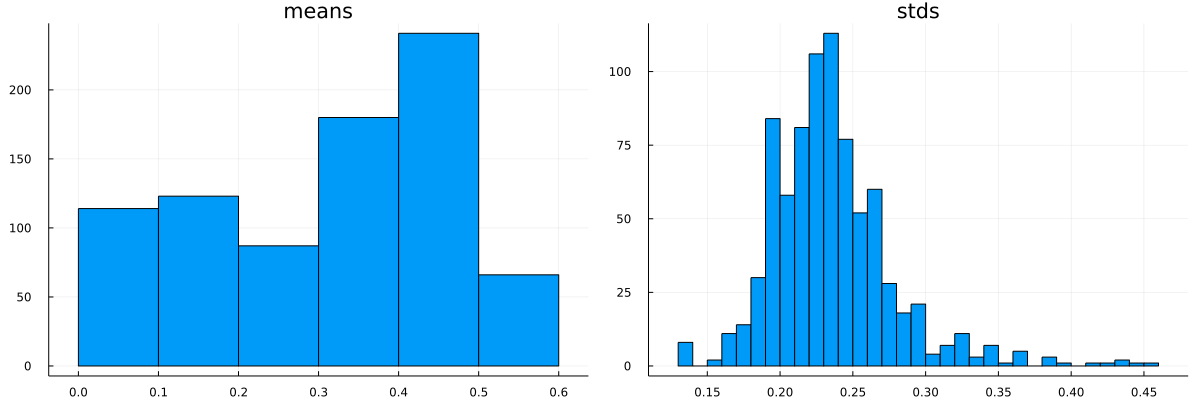

In [52]:
row_means = mean(norm, dims=2)
row_stds = std(norm, dims=2)
plots = [
    histogram(row_means, label=nothing, title="means"),
    histogram(row_stds, label=nothing, title="stds"),
]
plot(plots..., layout=grid(1, 2), size=(1200, 400))